In [21]:
#Rashid, Tariq. Make Your Own Neural Network 

#class for a dog object 
class Dog: 
    
    #dogs can bark() 
    def bark(self): 
        print("woof!") 
        pass
    pass

sizzles = Dog() #creates variable sizzles, an object from the Dog class definition
#objects are instances of a class
#Dog() is a function that creates an instance of the Dog class
sizzles.bark() #calls the bark function on the sizzles object

woof!


In [22]:
sizzles = Dog()
mutley = Dog()
sizzles.bark()
mutley.bark()

woof!
woof!


In [23]:
#methods are object functions

#class for a dog object 
class Dog: 
    
    #initialization method with internal data
    def __init__(self, petname, temp): 
        #() indicate parameters for the function
        #self means variables are part of this object itself
        self.name = petname
        self.temperature = temp
    
    #get status
    def status(self):
        #this function just prints out dog's name and temperature
        print("dog name is", self.name)
        print("dog temperature is", self.temperature)
        pass
    
    #set temperature
    def setTemperature(self,temp):
        self.temperature = temp;
        pass
    
    #dogs can bark() 
    def bark(self): 
        print("woof!") 
        pass
    
    pass


In [24]:
#creates a new object from the Dog class
lassie = Dog("Lassie", 37)

In [25]:
lassie.status()
#prints out dog's name and curren temperature

dog name is Lassie
dog temperature is 37


In [26]:
#change the temperature
lassie.setTemperature(40)
lassie.status()

dog name is Lassie
dog temperature is 40


In [27]:
#woohoo start making Python neuronetwork

#how do neural networks work?
    #neural networks have an input, output, and some type of calculation in between
        #we can adjust the parameters when we don't know how exactly something works
        #we adjust the parameters based on how wrong the model is when compared to true examples
    #training
        #the slope parameter is adjusted based on the output error
        #a learning rate moderates the updates so that a single example does not dominate the learning
        #moderating helps to limit impact of false examples
    #calculation stuff
        #the calculations in a nueral network are done via matrix multiplication
        #neural networks learn by refining their link weights
            #this is guided by the error (difference between desired and actual output)
            #backpropagating the error can be expressed through matrix multiplication
        #gradient descent - method for find the minimum of a function
            #neural network's error = a function of internal link weights
            #we can reduce the error by changing the weights
            #this is done iteratively through gradient descent, with small steps taken in the direction of the greatest downward slope
        

#skeleton
    #initialization - set the # of input, output, and hidden nodes
    #train - refine the weights after given a training set to learn from 
    #query - produce output from input nodes

In [2]:
#code for 3 layer neural network and learning the MNIST Data set

#neural network class definition
import numpy
import scipy.special
    #apply sigmoid function
    #scipy special for the sigmoid fuction expit ()

class neuralNetwork:
    
    #initialize the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        #set number of nodes input, hidden, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        #create network of nodes and links
        #link weights are used to calculated the signal fed forward and error propagated backwards
        #to refine the network

        #this can be expressed by a matrix
        #weights for links between input and hidden layers
            #size = (hidden_nodes, input_nodes)
        #weights for links between hidden and ouput layers
            #size = (ouput_nodes, hidden_nodes)
        
        #create two link weight matrices using the self-inodes, self.hnodes, and sefl.onodes
        #link weight matrices, wih and who
        self.wih = (numpy.random.rand(self.hnodes,self.inodes)-0.5)
        self.who = (numpy.random.rand(self.onodes,self.hnodes)-0.5)

        #learning rate
        #self.lr = learningrate
        pass
    
        #activation function is the sigmoid function
        #lambda - this just means we don't need to use the def() definitions; nameless/anonymous
        self.activation_function = lambda x: scipy.special.expit(x)
    
    #train the neural netowrk
    def train(self, inputs_list, targets_list):
        
        #find output for specfic example
       
        inputs = numpy.array(inputs_list, ndmin = 2).T
        #convert inputs_list to 2d array
        targets = numpy.array(targets_list, ndmin=2).T
        #turns targets_list into array
        
        #takes input to a neural network and returns the network's output
        #pass input signals from input layer through hidden layer and the final output layer
        #calculage signals into hidden layer
        
        hidden_inputs = numpy.dot(self.wih,inputs)
        #applies numpy library's dot product function for matrices to link weights w (hidden input) and inputs I
        
        #calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        #calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        #calculate signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        #compare calculated output with desired output
        #error = target-actual
        output_errors = targets - final_outputs
        
        #hidden layer error is the output errors, split by weights, recombined at the hidden nodes
        hidden_errors = numpy.dot(self.who.T, output_errors)
        
        #update the weights for the links between the hidden and output layers 
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs)) 
        
        #update the weights for the links between the input and hidden layers
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))

        pass
    
    #query the neural network
    def query(self, inputs_list):
        
        #convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin = 2).T
    
        #takes input to a neural network and returns the network's output
        #pass input signals from input layer through hidden layer and the final output layer
    
        #calculage signals into hidden layer
        hidden_inputs = numpy.dot(self.wih,inputs)
        #applies numpy library's dot product function for matrices to link weights w (hidden input) and inputs I

        #calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        #calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        
        #calculate signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs
        
        pass

In [7]:
data_file = open("desktop/mnist_train.csv", 'r') 
data_list = data_file.readlines() 
data_file.close()

In [8]:
len(data_list)
#how long the list is

60000

In [9]:
data_list[0]
#content of the first record

'5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,1,154,253,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,139,253,190,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,190,253,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,241,225,160,108,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81,240,253,253,119,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [10]:
import numpy
import matplotlib.pyplot
%matplotlib inline

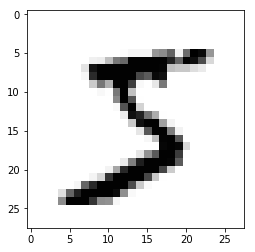

In [12]:
all_values = data_list[0].split(',')
#splits the above data list with commas
image_array = numpy.asfarray(all_values[1:]).reshape((28,28))
#convert text strings into numbers and create 28 by 28 array
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')
#plots image_array using imshow()

In [13]:
#rescale color input values and shift them up to the desired range 0.01 to 1.00
scaled_input = (numpy.asfarray(all_values[1:])/255.0*0.99)+0.01
print(scaled_input)

[ 0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.

In [14]:
#construct target matrix

#output nodes is 10
onodes = 10

targets = numpy.zeros(onodes) + 0.01
#create array with zeros
#why do we add 0.01 at the end????

targets[int(all_values[0])] = 0.99
#converts first input string into an integer and set the right element of the targets list to 0.99.
#why are we setting the targets list to 0.99??

In [15]:
print(targets)

[ 0.01  0.01  0.01  0.01  0.01  0.99  0.01  0.01  0.01  0.01]


In [21]:
#testing the network
#load the mnist test data CSV file into a list 
test_data_file = open("desktop/mnist_train.csv", 'r') 
test_data_list = test_data_file.readlines() 
test_data_file.close()

In [22]:
#get the first test record
all_values = test_data_list[0].split(',')
#print the label
print(all_values[0])

5


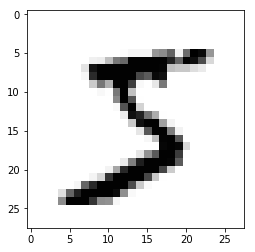

In [23]:
image_array = numpy.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')

In [27]:
n.query((numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01)

ValueError: shapes (3,3) and (784,1) not aligned: 3 (dim 1) != 784 (dim 0)

3 3


In [5]:
#this is a small neural network with 3 nodes in each layer and a learning rate of 0.5

#number of input, hidden, and output nodes
input_nodes = 3
hidden_nodes = 3
output_nodes = 3

#learning rate is 0.3
learning_rate = 0.3

#create instance of neural netowrk
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

n.query([1.0, 0.5, -1.5])

array([[ 0.53718858],
       [ 0.45250054],
       [ 0.49064722]])

In [ ]:
#generate random values
numpy.random.rand(3,3)

In [ ]:
#create negative values by expanding range to appx. (-0.5, 0.5)
numpy.random.rand(3,3)-0.5